In [52]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [53]:
# Load the dataset
df = pd.read_csv("train.csv")

In [54]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [55]:
# Data preprocessing (handle missing values, data types, etc.)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [56]:
# set index as ID_LAT_LON_YEAR_WEEK
if df.index.name != "ID_LAT_LON_YEAR_WEEK":
    df.set_index("ID_LAT_LON_YEAR_WEEK", inplace=True)

In [57]:
# EDA tasks
summary_stats = df.describe()
summary_stats

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,...,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000246,0.167371,0.000186,0.064430,58.019802,12.775199,...,1424.121581,9023.402405,1355.082566,13.505496,0.049282,30.281299,6.408500,37.721217,4.390328,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000065,0.730940,-0.000053,0.123332,-41.806629,31.209518,...,4603.362733,53218.992678,3688.139591,10.008471,0.241699,-30.276399,35.850589,-125.822386,24.713837,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5584.422966,59403.443128,4630.746804,15.205027,0.272412,-12.653263,41.073490,-85.397329,28.289776,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000117,0.905362,0.000093,0.199492,30.969258,44.906770,...,6534.822189,65612.718663,5566.268062,23.708138,0.302675,9.250658,44.423683,-48.283981,31.481630,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


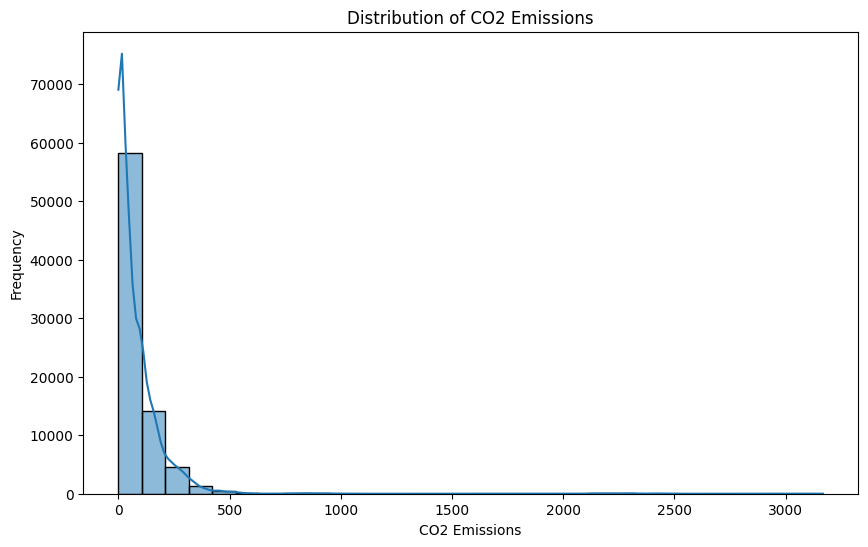

In [58]:
# Plotting Distribution of CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(df["emission"], bins=30, kde=True)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.show()

In [59]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Cluster features using hierarchical clustering
corr_clusters = sch.linkage(correlation_matrix, method="ward")
col_order = sch.leaves_list(corr_clusters)

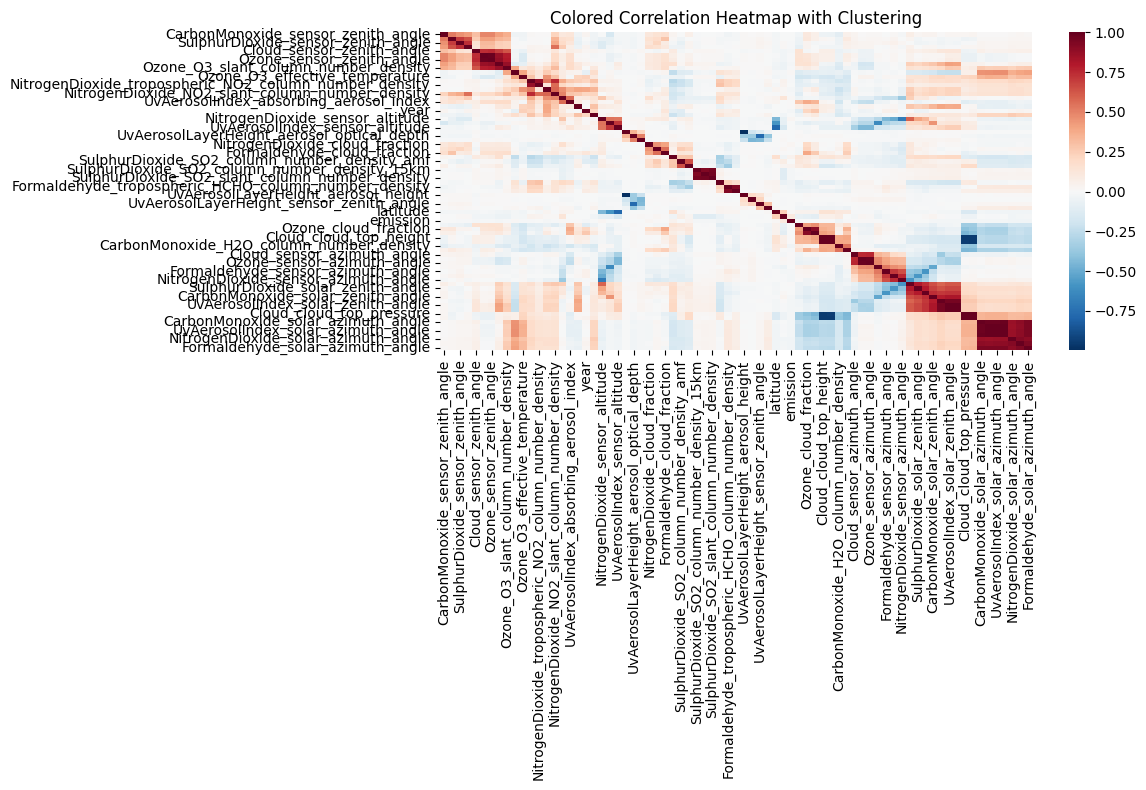

In [60]:
# Set up the figure
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.iloc[col_order, col_order], annot=False, cmap="RdBu_r", center=0
)
plt.title("Colored Correlation Heatmap with Clustering")
plt.tight_layout()
plt.show()

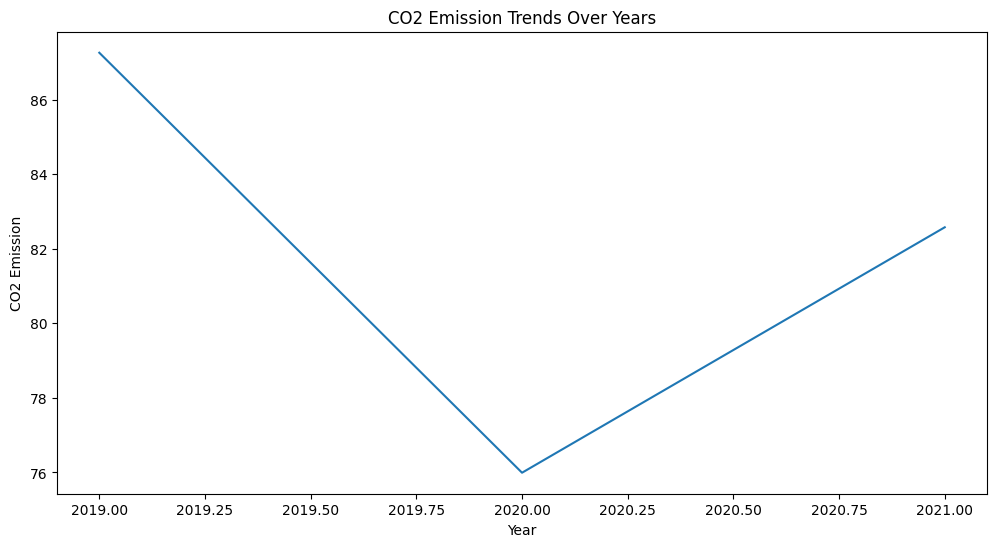

In [61]:
# Time trends, drop in 2020 mayb due to covid
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="emission", errorbar=None)
plt.title("CO2 Emission Trends Over Years")
plt.xlabel("Year")
plt.ylabel("CO2 Emission")
plt.show()

Let's set our target column as 'emission'

In [62]:
target = df["emission"]
target

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2019_00     3.750994
ID_-0.510_29.290_2019_01     4.025176
ID_-0.510_29.290_2019_02     4.231381
ID_-0.510_29.290_2019_03     4.305286
ID_-0.510_29.290_2019_04     4.347317
                              ...    
ID_-3.299_30.301_2021_48    29.404171
ID_-3.299_30.301_2021_49    29.186497
ID_-3.299_30.301_2021_50    29.131205
ID_-3.299_30.301_2021_51    28.125792
ID_-3.299_30.301_2021_52    27.239302
Name: emission, Length: 79023, dtype: float64

## <span style="font-family: 'Arial'; font-size: 24px;">Exploring Correlation in the Dataset</span>

<span style="font-family: 'Times New Roman'; font-size: 16px;">In this section, we explore the correlation between features in the dataset. We split the data into two subsets: the first 5 rows (high_correlated_features) the remaining rows (low_correlated_features), excluding the 'emission' column to analyze the correlation separately.</span>


In [63]:
high_correlated_features = df.iloc[:, 0:4]
high_correlated_features

,latitude,longitude,year,week_no
ID_LAT_LON_YEAR_WEEK,,,,
ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0
ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1
ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2
ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3
ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4
...,...,...,...,...
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50


In [64]:
low_correlated_features = df.iloc[:, 5:-1]
low_correlated_features

,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
ID_-0.510_29.290_2019_01,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
ID_-0.510_29.290_2019_02,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,2703.236800,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
ID_-0.510_29.290_2019_03,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,0.000015,0.036790,2076.073332,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
ID_-0.510_29.290_2019_04,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,24.331972,-0.000028,0.034675,2053.608490,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,1.195643,0.000340,0.191313,72.820518,55.988022,-140.821274,25.148563,0.000131,0.026488,1999.322864,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
ID_-3.299_30.301_2021_49,1.130868,0.000063,0.177222,-12.856753,19.435339,-131.114411,31.197638,0.000030,0.026049,1887.259212,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
ID_-3.299_30.301_2021_50,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,0.000015,0.030098,1967.424136,...,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166


In [65]:
# function to plot the histogram
def corr_features(df, target):
    series_corr = {}
    for c in df:
        series_corr[c] = df[c].corr(target)
    sns.histplot(series_corr)

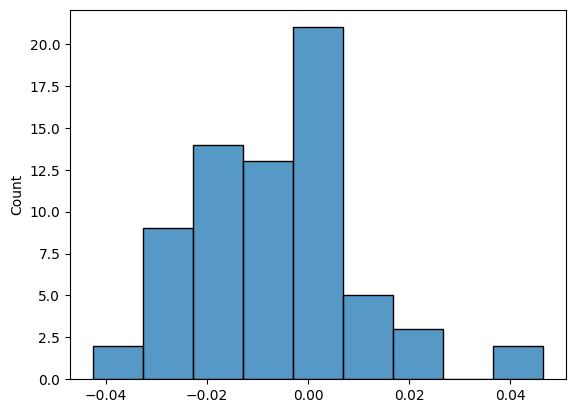

In [66]:
corr_features(low_correlated_features, target)

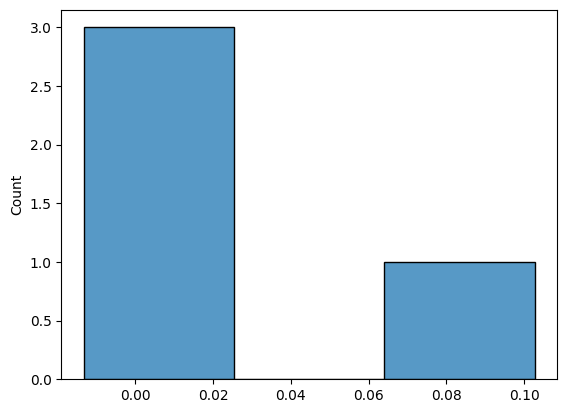

In [67]:
corr_features(high_correlated_features, target)

In [68]:
# imports
from sklearn.ensemble import RandomForestRegressor

In [69]:
# RandomforestRegressor Model initialization
def train(train_df, target_col):
    model = RandomForestRegressor(n_estimators=10)
    model.fit(train_df, target_col)
    print(model.score(train_df, target_col))
    return model

In [70]:
train_df = df.iloc[:, 0:-1]

In [71]:
target_col = df.iloc[:, -1]
target_col

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2019_00     3.750994
ID_-0.510_29.290_2019_01     4.025176
ID_-0.510_29.290_2019_02     4.231381
ID_-0.510_29.290_2019_03     4.305286
ID_-0.510_29.290_2019_04     4.347317
                              ...    
ID_-3.299_30.301_2021_48    29.404171
ID_-3.299_30.301_2021_49    29.186497
ID_-3.299_30.301_2021_50    29.131205
ID_-3.299_30.301_2021_51    28.125792
ID_-3.299_30.301_2021_52    27.239302
Name: emission, Length: 79023, dtype: float64

In [72]:
# printing the  model score
model = train(train_df, target_col)

0.9951823847963962


<Axes: >

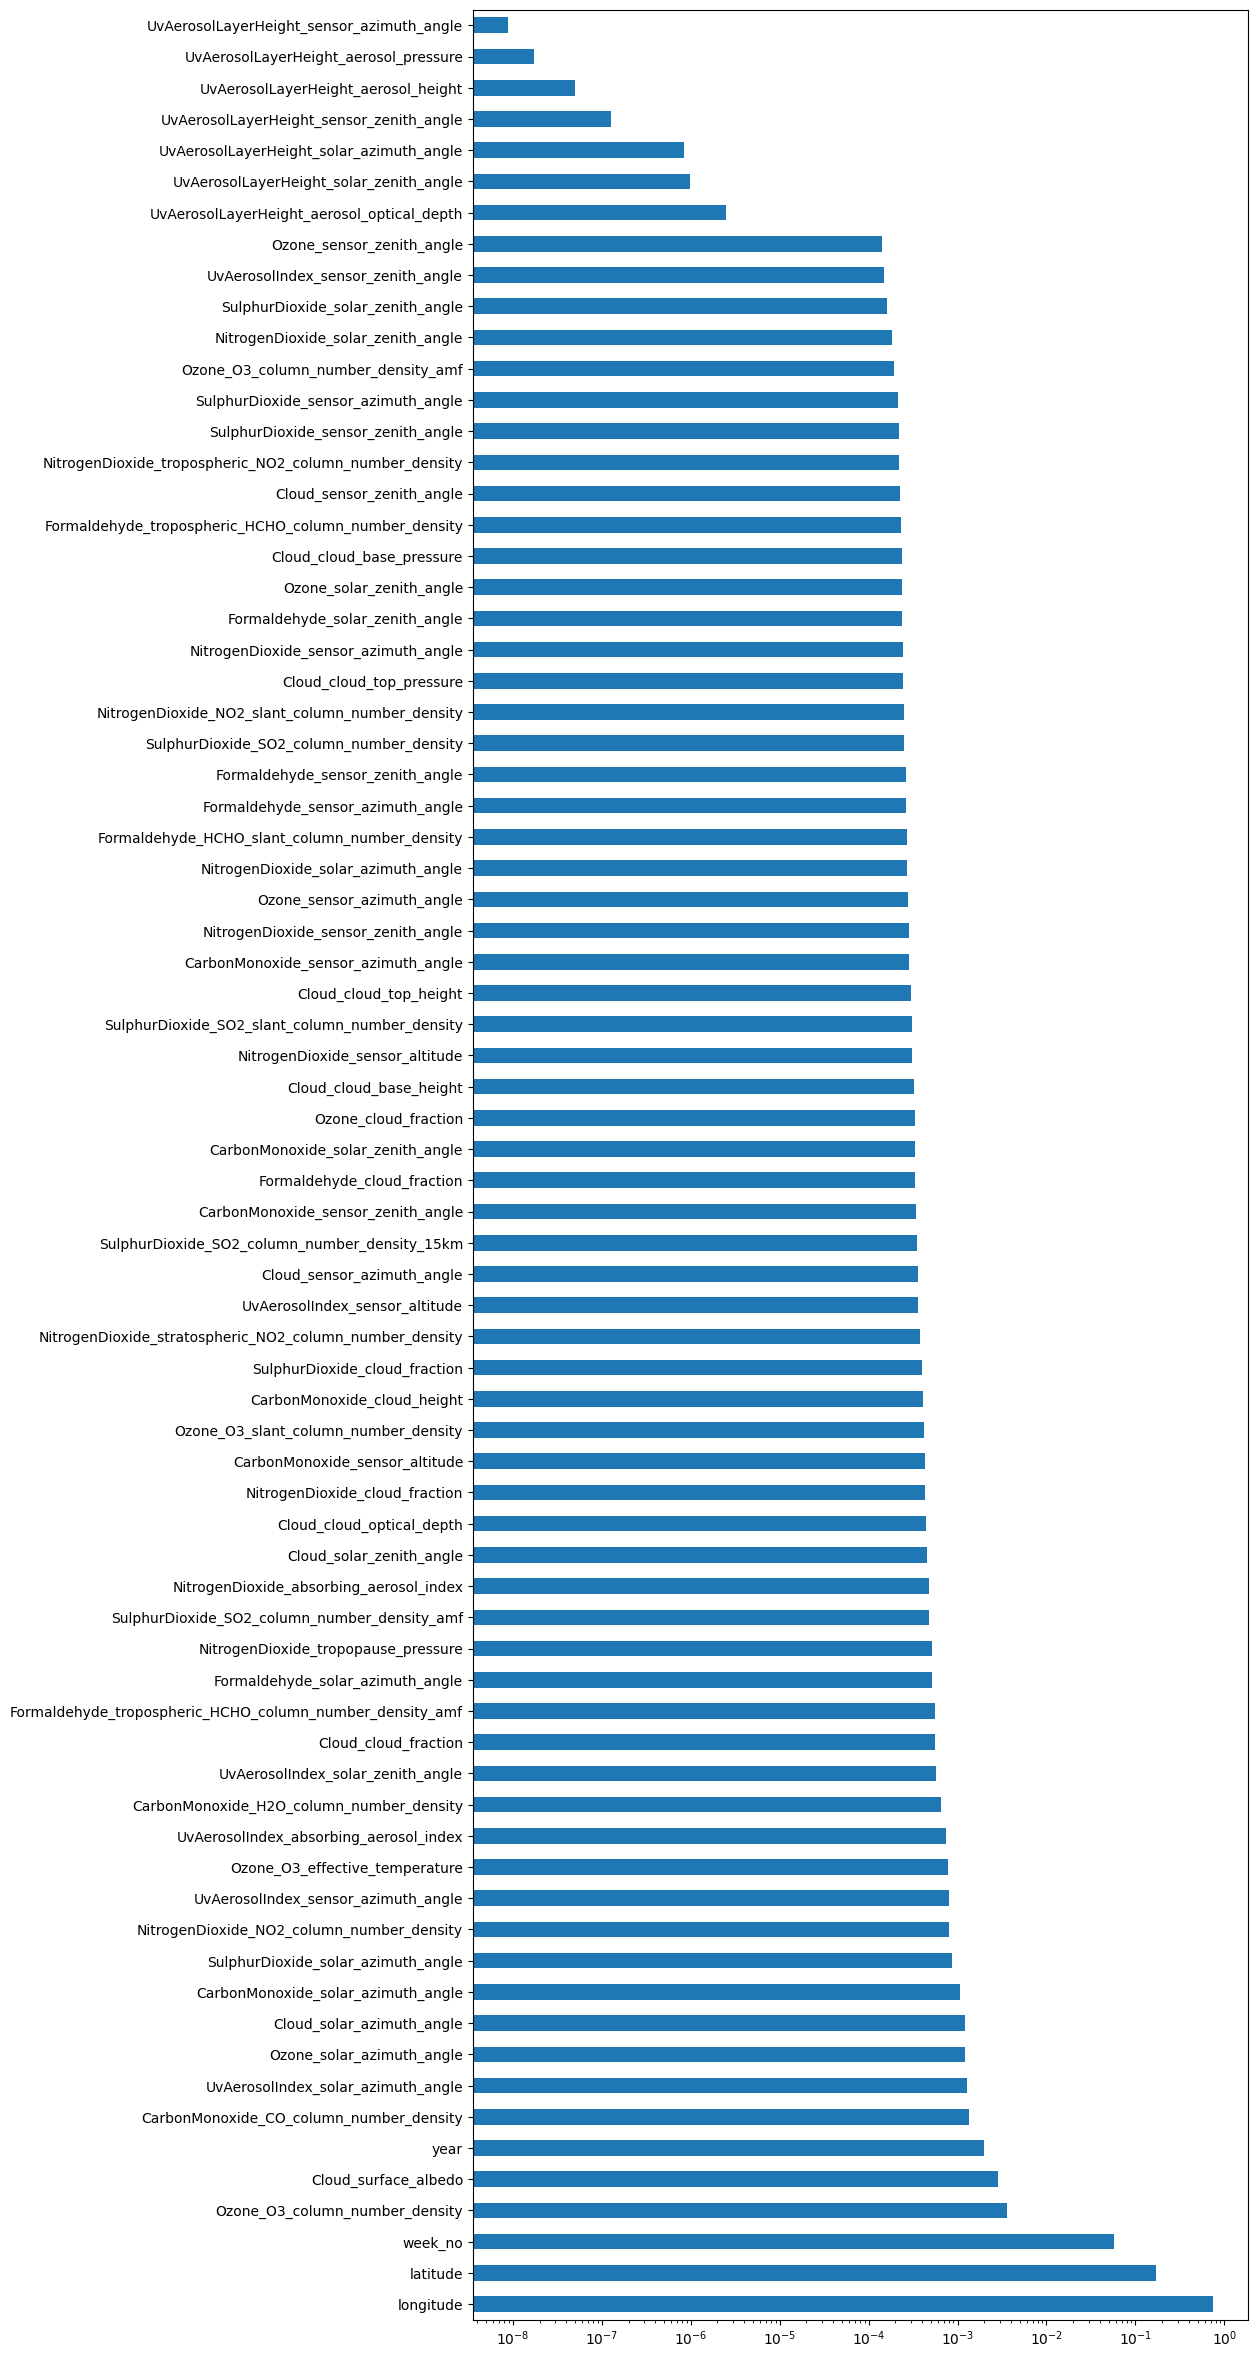

In [73]:
# Visualization of the feature importance of all 75 columns
importance = pd.Series(model.feature_importances_, index=train_df.columns)
importance.nlargest(75).plot(kind="barh", logx=True, figsize=(10, 30))

## <span style="font-family: 'Arial'; font-size: 24px;">Checking the model's efficiency</span>

<span style="font-family: 'Times New Roman'; font-size: 16px;"> checking the model's efficiency by removing the least important columns which are the first 7 from the top, retaining the rest of the columns. The efficiency score is same as the previous one. </span>

In [74]:
important_df = train_df[importance.sort_values(ascending=False)[:-7].keys()]
important_df

,longitude,latitude,week_no,Ozone_O3_column_number_density,Cloud_surface_albedo,year,CarbonMonoxide_CO_column_number_density,UvAerosolIndex_solar_azimuth_angle,Ozone_solar_azimuth_angle,Cloud_solar_azimuth_angle,...,Formaldehyde_tropospheric_HCHO_column_number_density,Cloud_sensor_zenith_angle,NitrogenDioxide_tropospheric_NO2_column_number_density,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_sensor_azimuth_angle,Ozone_O3_column_number_density_amf,NitrogenDioxide_solar_zenith_angle,SulphurDioxide_solar_zenith_angle,UvAerosolIndex_sensor_zenith_angle,Ozone_sensor_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,29.290,-0.510,0,0.115927,0.272292,2019,0.035370,-138.786446,-138.786446,-138.786423,...,0.000117,35.632416,1.220016e-05,50.843559,-98.593887,2.506609,28.316388,35.874496,35.632416,35.632416
ID_-0.510_29.290_2019_01,29.290,-0.510,1,0.116775,0.256830,2019,0.036526,-142.786141,-143.097868,-145.183930,...,0.000170,39.557633,1.639765e-05,39.137194,16.592861,2.657704,30.054262,28.965133,43.485327,42.596541
ID_-0.510_29.290_2019_02,29.290,-0.510,2,0.117039,0.251101,2019,0.035338,-135.364627,-135.364627,-142.519545,...,0.000080,30.401823,4.267369e-07,52.868816,72.795837,2.619104,23.206415,23.206415,41.269033,41.269033
ID_-0.510_29.290_2019_03,29.290,-0.510,3,0.116434,0.262043,2019,0.036790,-137.489602,-137.489602,-132.665828,...,0.000127,24.380357,1.220016e-05,37.436189,-7.925870,2.525818,28.316388,27.722311,34.458740,34.458740
ID_-0.510_29.290_2019_04,29.290,-0.510,4,0.117373,0.235847,2019,0.034675,-136.448518,-136.448518,-141.509805,...,0.000269,37.392979,2.056437e-05,35.515587,4.121269,2.572243,24.729026,24.331972,41.794705,41.794705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,30.301,-3.299,48,0.115488,0.304797,2021,0.026488,-129.949217,-129.950105,-129.935508,...,0.000064,40.113533,8.024310e-06,55.988022,72.820518,2.715852,32.324131,25.148563,40.093391,40.081854
ID_-3.299_30.301_2021_49,30.301,-3.299,49,0.114957,0.314015,2021,0.026049,-133.307545,-133.307545,-134.252871,...,0.000101,47.528435,8.476496e-06,19.435339,-12.856753,2.685745,33.416246,31.197638,42.519018,42.519018
ID_-3.299_30.301_2021_50,30.301,-3.299,50,0.114637,0.288058,2021,0.030098,-134.750981,-134.750981,-134.731723,...,-0.000069,35.328098,2.979501e-06,37.436189,-7.925870,2.571747,34.959241,27.722311,35.359190,35.359190


In [75]:
important_df.fillna(important_df.mean(), inplace=True)

/var/folders/f2/d3zb7g417sgdklvf0bbv8jzm0000gn/T/ipykernel_79608/2978027372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_df.fillna(important_df.mean(), inplace=True)


In [76]:
model2 = train(important_df, target_col)

0.995270623867137


In [77]:
# importing the test data
test_df = pd.read_csv("test.csv")
if test_df.index.name != "ID_LAT_LON_YEAR_WEEK":
    test_df.set_index("ID_LAT_LON_YEAR_WEEK", inplace=True)

In [78]:
test_df.fillna(test_df.mean(), inplace=True)

In [79]:
predictions = model.predict(test_df)
print(predictions)

[ 4.13805234  3.99580967  4.0648574  ... 27.4900834  28.3891183
 27.4766148 ]


<Axes: ylabel='Count'>

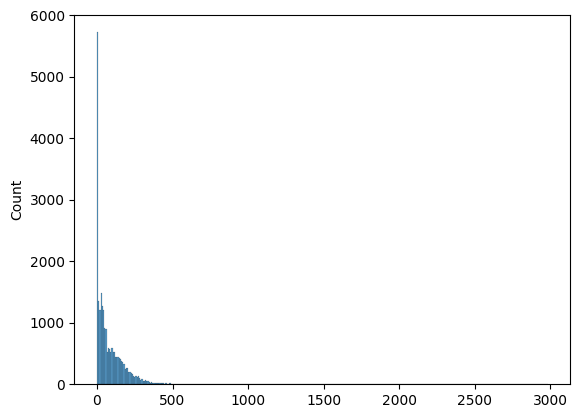

In [80]:
sns.histplot(predictions)

In [81]:
# formatting the output of the predicted values and saving it to a file
index_values = test_df.index.values
formatted_predictions = ["{:.2f}".format(pred) for pred in predictions]
result_array = np.column_stack((index_values, formatted_predictions))
np.savetxt(
    "predicted_values_with_emission.csv",
    result_array,
    delimiter=",",
    fmt="%s,%s",
    header="emission,predicted_value",
    comments="",
)

In [82]:
train_df

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166


## <span style="font-family: 'Arial'; font-size: 24px;"> Cross Validation </span>
<span style="font-family: 'Times New Roman'; font-size: 16px;"> Performing the EDA on the main dataset containing all columns and rows and the splitting the dataset to check our output from the model against the 'emission' values contained the data. </span>

In [83]:
if df.index.name != "ID_LAT_LON_YEAR_WEEK":
    df.set_index("ID_LAT_LON_YEAR_WEEK", inplace=True)

In [84]:
df.fillna(df.mean(), inplace=True)

In [85]:
df.isnull().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Length: 75, dtype: int64

In [86]:
X = df.drop(columns=["emission"])
y = df["emission"]

X.shape, y.shape

((79023, 74), (79023,))

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63218, 74), (15805, 74), (63218,), (15805,))

In [88]:
m1 = train(X_train, y_train)
p1 = m1.predict(X_test)

0.9958869785508321


In [89]:
y_actual = pd.Series(p1)
y_actual.index = y_test.index
y_actual.name = "predicted"
y_actual

ID_LAT_LON_YEAR_WEEK
ID_-1.307_30.393_2020_03    109.945763
ID_-2.082_29.218_2020_04     10.313752
ID_-1.510_30.190_2019_44    245.669079
ID_-2.819_29.981_2020_45     36.236312
ID_-1.486_29.314_2019_06     19.570319
                               ...    
ID_-3.136_30.364_2021_18     15.690441
ID_-2.820_28.380_2021_47     23.336564
ID_-2.662_30.138_2020_39     36.440061
ID_-0.637_30.763_2019_26     48.506569
ID_-1.696_28.304_2019_24      0.000000
Name: predicted, Length: 15805, dtype: float64

In [90]:
# comparing actual vs predicted outputs
compare_df = pd.DataFrame([y_test, y_actual]).T
compare_df

,emission,predicted
ID_LAT_LON_YEAR_WEEK,,
ID_-1.307_30.393_2020_03,116.547440,109.945763
ID_-2.082_29.218_2020_04,11.595166,10.313752
ID_-1.510_30.190_2019_44,261.624330,245.669079
ID_-2.819_29.981_2020_45,32.747440,36.236312
ID_-1.486_29.314_2019_06,19.810934,19.570319
...,...,...
ID_-3.136_30.364_2021_18,16.432629,15.690441
ID_-2.820_28.380_2021_47,24.202066,23.336564
ID_-2.662_30.138_2020_39,29.647293,36.440061


In [91]:
residual = compare_df.emission - compare_df.predicted
sqrt((residual**2).mean())

24.16898323975347

<Axes: >

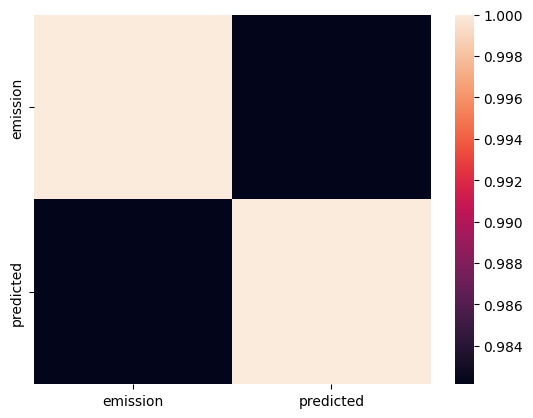

In [92]:
sns.heatmap(compare_df.corr())